# CASE STUDY 2 – Machine Learning: Classification Models

## Problem Statement

In this task, the objective is to apply machine learning classification techniques to analyze a dataset and make predictions based on its features. The chosen dataset, **Spotify Songs**, contains a variety of musical metadata and audio features for tracks and playlists. The dataset includes attributes such as song popularity, genre, danceability, energy, and more, making it suitable for classification tasks.

The goal is to develop three machine learning classification models, which have not been covered in the lecture or lab, to predict an outcome variable based on these features. The models will be evaluated based on their ability to classify and make predictions, using appropriate metrics to compare their performance.


## About Dataset

Almost 30,000 Songs from the Spotify API.

The dataset contains detailed information about songs, playlists, and their musical characteristics. It includes variables such as song IDs, names, artists, popularity scores, album information, and release dates. Additionally, it covers playlist metadata (name, genre, subgenre) and audio features like danceability, energy, key, loudness, and tempo. Other relevant attributes include whether a track has speech, acoustic or instrumental content, and how live or positive the track sounds. The duration of each song is also recorded in milliseconds.

Link : https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs?select=readme.md

## Table of Contents
1. [Importing dependencies](#p1)
2. [Exploratory data analysis](#p2)
3. [Splitting the data into train & test data](#p3)
4. [Model Building](#p4)
   * [Perform cross validation with RepeatedKFold](#p4-1)
   

## <a name="p1">Importing Dependencies</a>

In [ ]:
import numpy as np
import pandas as pd
import time
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score, classification_report, confusion_matrix,
    average_precision_score, precision_recall_curve
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV,
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, RandomForestClassifier
)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


## <a name="p2">Exploratory data analysis and Data preprocessesing</a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
print("Google Drive mounted successfully")

Mounted at /content/gdrive
Google Drive mounted successfully


In [ ]:

# Loading the data
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/spotify_songs.csv')

df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
#check for null
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [ ]:
# Drop rows with missing values
df_cleaned = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])
print(df_cleaned.isnull().sum())

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [ ]:
# Checking the shape
df.shape

(32833, 23)

In [ ]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# Checking distribution of numerical values in the dataset
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
# Checking the playlist genre distribution of the target variable
df['playlist_genre'].value_counts()

,count
playlist_genre,
edm,6043
rap,5746
pop,5507
r&b,5431
latin,5155
rock,4951


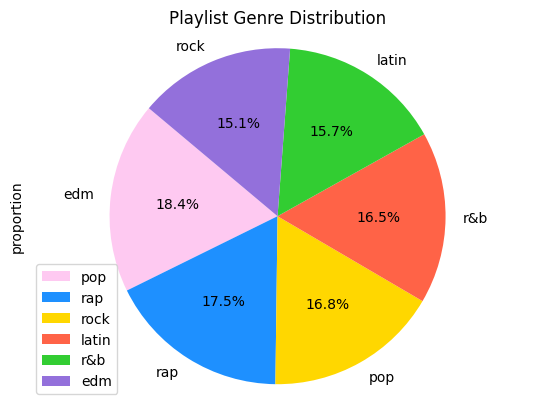

Number of edm records: 6043
Number of rap records: 5746
Number of pop records: 5507
Number of r&b records: 5431
Number of latin records: 5155
Number of rock records: 4951


In [ ]:
# Get the distribution of genres
class_distribution = df['playlist_genre'].value_counts(normalize=True) * 100

# Define colors for the pie chart
colors = ['#FEC9F1', '#1E90FF', '#FFD700', '#FF6347', '#32CD32', '#9370DB']  # Add more colors if needed

# Plot the genre distribution as a pie chart
class_distribution.plot.pie(colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Playlist Genre Distribution')
plt.legend(df['playlist_genre'].unique(), loc="best")
plt.show()

# Count the number of records for each genre
class_counts = df['playlist_genre'].value_counts()

# Print the number of records for each genre
for genre, count in class_counts.items():
    print(f"Number of {genre} records: {count}")


In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to all categorical columns in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now, df contains only numerical values
print(df.head())  # Display the first few rows to check the encoding

   track_id  track_name  track_artist  track_popularity  track_album_id  \
0     24150        8898          2782                66            8225   
1      3061       12520          6084                67           17650   
2      7219         924         10416                70            3798   
3     25699        3020          9215                60            5293   
4      5987       17910          5402                69           21936   

   track_album_name  track_album_release_date  playlist_name  playlist_id  \
0              7614                      4315            292          235   
1             10410                      4492            292          235   
2               985                      4335            292          235   
3              2798                      4348            292          235   
4             14843                      4220            292          235   

   playlist_genre  ...  key  loudness  mode  speechiness  acousticness  \
0           

In [ ]:
# Checking the correlation
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Checking the correlation of numeric features
corr = numeric_df.corr()

# Display the correlation matrix
corr


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,1.000000,-0.005731,-0.010959,0.018321,-0.010419,0.004510,0.007412,-0.001142,0.000689,-0.003899,...,-0.006807,-0.003563,-0.008024,-0.002484,0.011628,-0.006101,-0.006732,0.001291,-0.002823,0.006382
track_name,-0.005731,1.000000,0.025245,-0.006855,0.005324,0.458779,0.004374,-0.000832,-0.000399,0.007869,...,0.019602,-0.016056,0.003898,-0.009098,0.013265,0.009443,0.005911,-0.007374,0.001848,-0.003948
track_artist,-0.010959,0.025245,1.000000,0.004297,-0.001840,0.057541,-0.006968,0.007027,0.002689,0.041890,...,-0.000094,-0.021692,0.020547,-0.028157,-0.008229,0.020985,0.005239,-0.007540,0.006445,-0.012944
track_popularity,0.018321,-0.006855,0.004297,1.000000,0.000595,-0.008730,0.155645,0.069319,-0.001480,0.042438,...,-0.000650,0.057687,0.010637,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682
track_album_id,-0.010419,0.005324,-0.001840,0.000595,1.000000,-0.002328,0.006556,0.000119,-0.001825,-0.012939,...,0.006825,0.003005,0.000900,-0.020940,0.009503,0.004593,-0.001069,0.000041,-0.000637,-0.020903
track_album_name,0.004510,0.458779,0.057541,-0.008730,-0.002328,1.000000,0.010220,0.014713,-0.004869,-0.007858,...,0.011391,-0.015574,-0.013984,-0.009652,-0.001995,0.010270,0.003724,-0.010075,0.002030,-0.013241
track_album_release_date,0.007412,0.004374,-0.006968,0.155645,0.006556,0.010220,1.000000,0.062312,0.040606,-0.403890,...,0.002311,0.235135,-0.079196,0.083176,0.051981,0.090876,-0.032429,-0.230052,0.033919,-0.392676
playlist_name,-0.001142,-0.000832,0.007027,0.069319,0.000119,0.014713,0.062312,1.000000,-0.036692,0.059601,...,0.002933,-0.035502,0.011926,-0.014747,0.090661,-0.019221,-0.019524,-0.021805,0.009623,0.002055
playlist_id,0.000689,-0.000399,0.002689,-0.001480,-0.001825,-0.004869,0.040606,-0.036692,1.000000,-0.080716,...,-0.005804,0.026537,0.010558,-0.062598,-0.026977,0.043842,0.016510,-0.042682,0.023420,-0.031645
playlist_genre,-0.003899,0.007869,0.041890,0.042438,-0.012939,-0.007858,-0.403890,0.059601,-0.080716,1.000000,...,-0.007412,-0.243377,0.065426,0.110447,0.094074,-0.170522,-0.009740,0.098330,-0.016678,0.105492


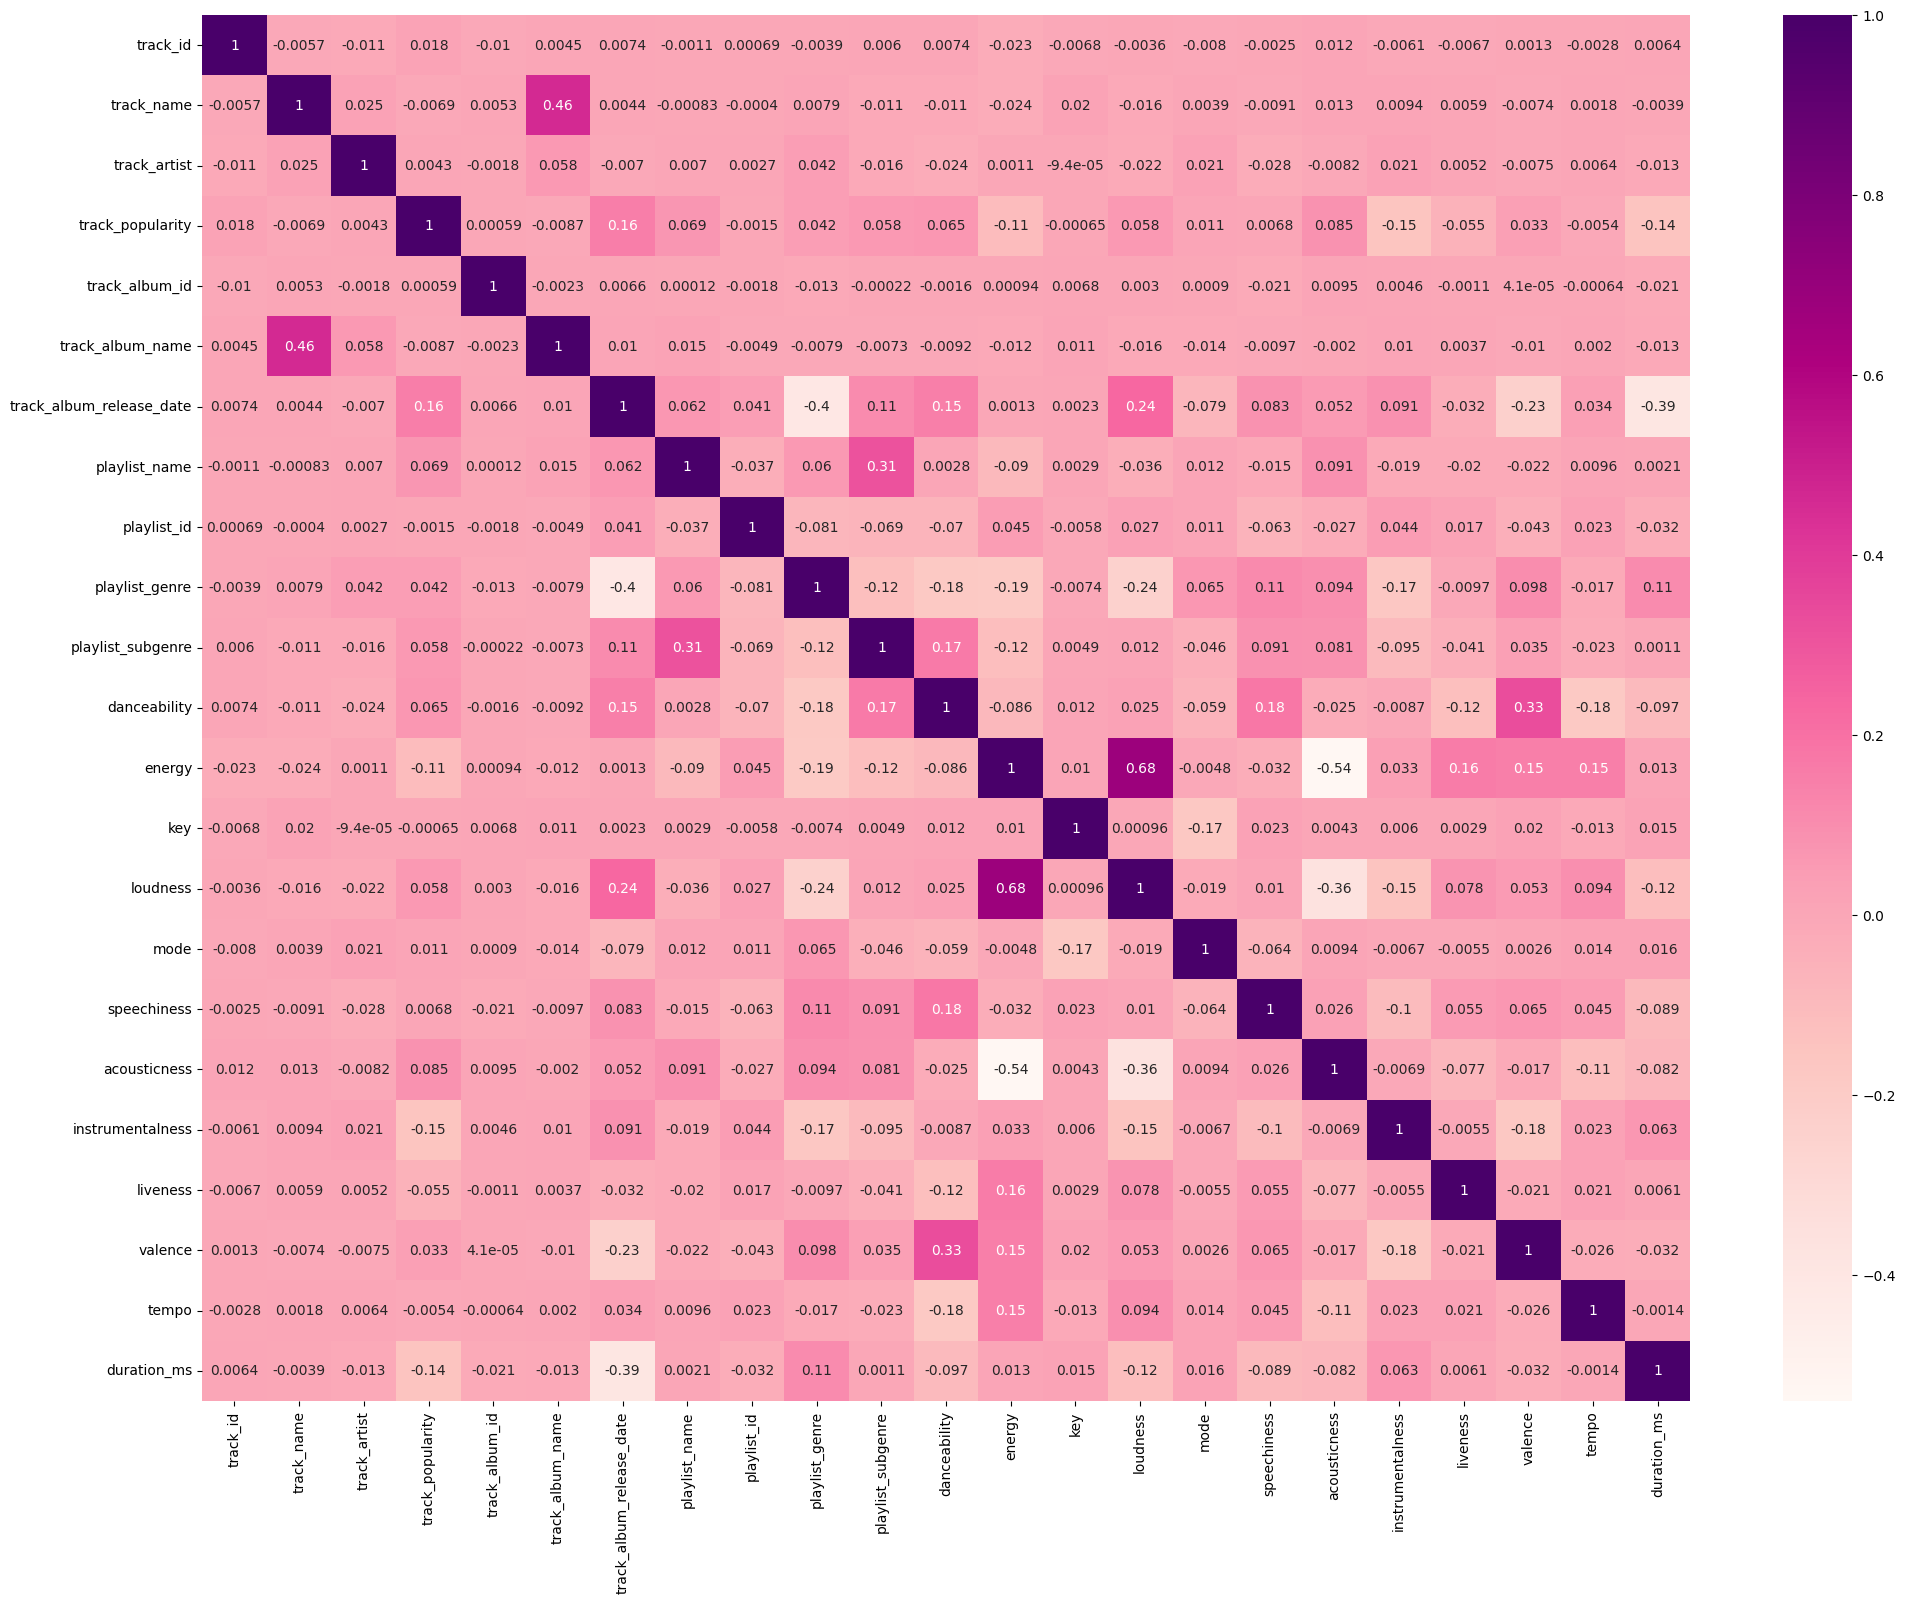

In [ ]:
#plot the heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="RdPu", annot=True)
plt.show()


In [ ]:
#The code calculates the absolute correlation values of the 'playlist genre' column with all the other columns in the DataFrame 'df', sorts them in descending order and returns a Series object.
df.corr()['playlist_genre'].abs().sort_values(ascending=False)

,playlist_genre
playlist_genre,1.000000
track_album_release_date,0.403890
loudness,0.243377
energy,0.190426
danceability,0.182478
instrumentalness,0.170522
playlist_subgenre,0.123840
speechiness,0.110447
duration_ms,0.105492
valence,0.098330


In [ ]:
cols_to_drop = [
    'track_album_id',
    'tempo',
    'track_name',
    'track_album_name',
    'key',
    'track_id',
    'track_artist',
    'track_popularity',
    'playlist_id',
    'playlist_name',
    'mode',
    'acousticness',
    'liveness',
    'duration_ms',
    'speechiness',
    'playlist_subgenre'
]

# Drop the useless columns
df = df.drop(columns=cols_to_drop)

# Display the cleaned DataFrame
df.head()

,track_album_release_date,playlist_genre,danceability,energy,loudness,instrumentalness,valence
0,4315,2,0.748,0.916,-2.634,0.000000,0.518
1,4492,2,0.726,0.815,-4.969,0.004210,0.693
2,4335,2,0.675,0.931,-3.432,0.000023,0.613
3,4348,2,0.718,0.930,-3.778,0.000009,0.277
4,4220,2,0.650,0.833,-4.672,0.000000,0.725


## <a name="p3">Splitting the data into train & test data</a>

In [ ]:
# Splitting the dataset into X and y
y= df['playlist_genre']
X = df.drop(['playlist_genre'], axis=1)

In [ ]:
# Checking some rows of X
X.head()

,track_album_release_date,danceability,energy,loudness,instrumentalness,valence
0,4315,0.748,0.916,-2.634,0.000000,0.518
1,4492,0.726,0.815,-4.969,0.004210,0.693
2,4335,0.675,0.931,-3.432,0.000023,0.613
3,4348,0.718,0.930,-3.778,0.000009,0.277
4,4220,0.650,0.833,-4.672,0.000000,0.725


In [ ]:
# Checking some rows of y
y.head()

,playlist_genre
0,2
1,2
2,2
3,2
4,2


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

80201
56010
24191


Plotting the distribution of a variable

In [ ]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

Creating a series of histograms to show the distribution of values for each feature column in the dataset, separated by normal and fraudulent records.

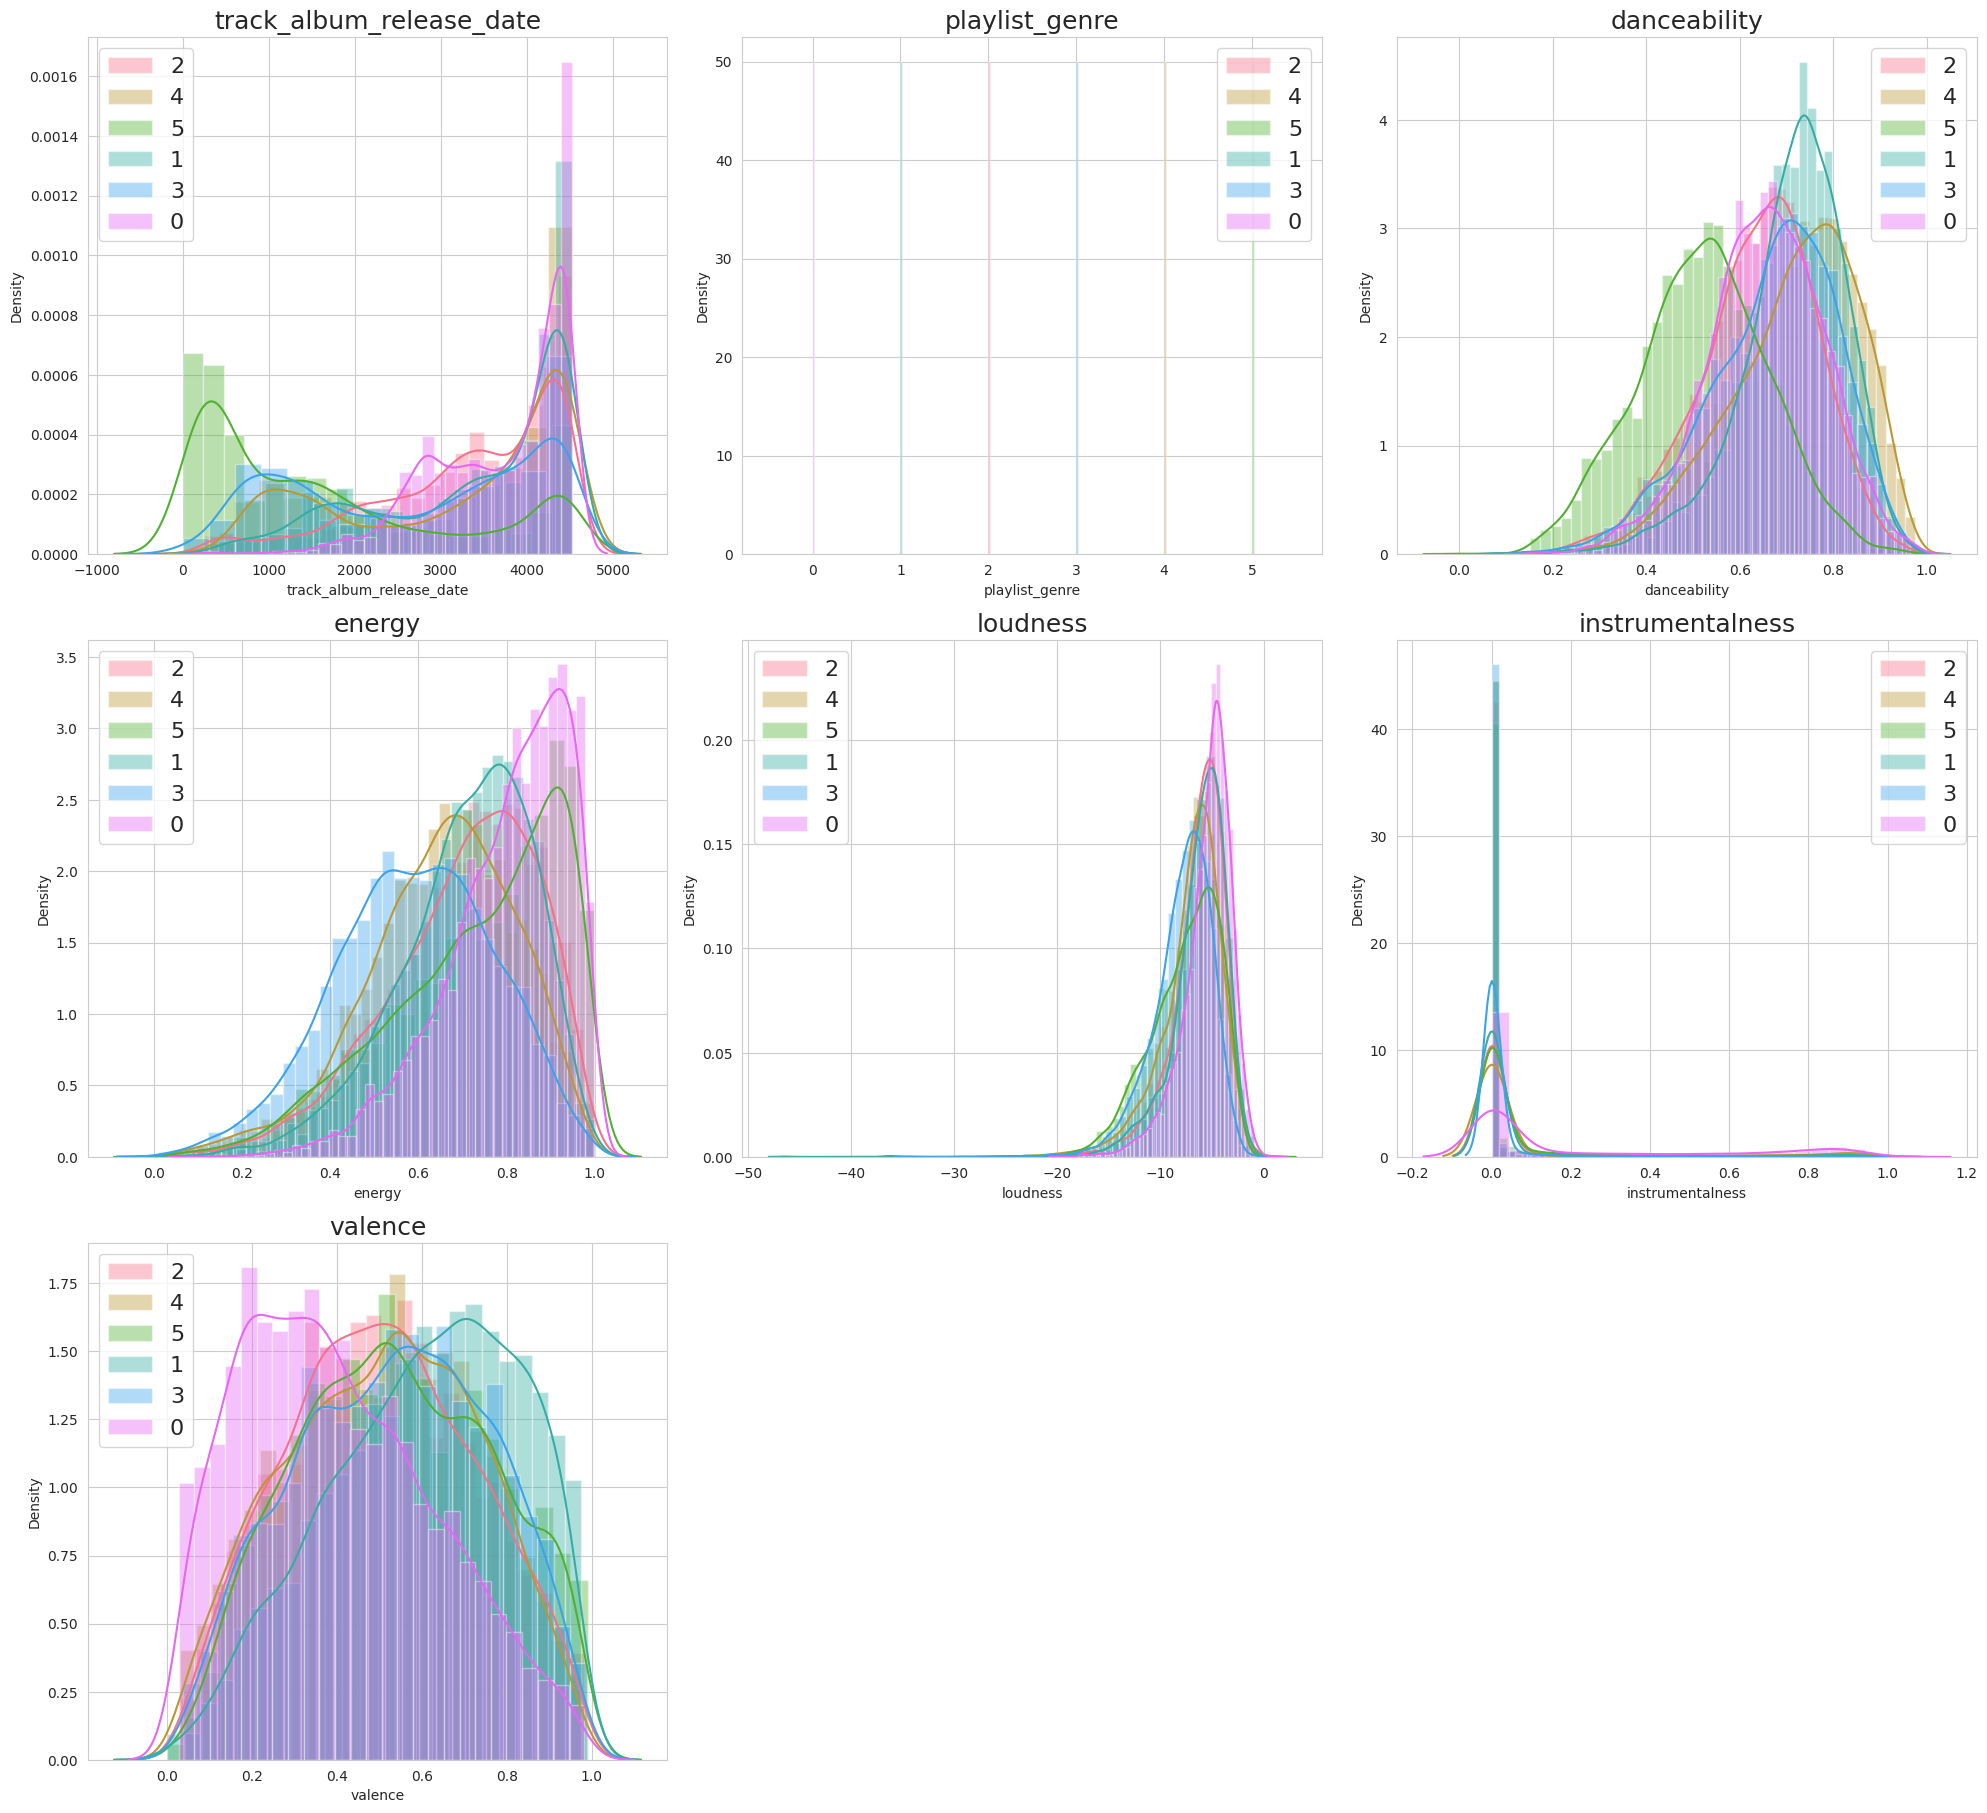

In [ ]:


# Set the color palette and grid style for the plot
sns.set_palette("husl")
sns.set_style("whitegrid")

# Create a figure with subplots for each feature column
plt.figure(figsize=(20, 60))
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()  # List of numeric columns

for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)  # Set the subplot location in the figure
    # Plot the distribution of values for each playlist genre
    for genre in df['playlist_genre'].unique():
        sns.distplot(df[col][df['playlist_genre'] == genre], label=genre)

    plt.legend(loc='best', prop={'size': 16})  # Add a legend with labels and location
    plt.title(col, fontsize=18)  # Add a title to the subplot

plt.tight_layout()  # Adjust subplot spacing
plt.show()  # Show the plot



## <a name="p4">Model Building</a>

In [ ]:
# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <a name="p4-1">Perform cross validation with RepeatedKFold</a>

In [ ]:


# Define the classifiers with default parameters
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Support Vector Classifier (SVC)": SVC(random_state=42)
}

# Define Repeated K-Fold cross-validator
repeated_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)  # 5 folds, 3 repeats

# Loop through classifiers, apply Repeated K-Fold cross-validation, and evaluate on the test set
for name, model in classifiers.items():
    # Perform cross-validation
    if name == "Support Vector Classifier (SVC)":  # SVC requires scaling
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
        model.fit(X_train_scaled, y_train)  # Train on scaled data
        y_pred = model.predict(X_test_scaled)  # Predict on scaled test data
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=repeated_kfold, scoring='accuracy')
        model.fit(X_train, y_train)  # Train on unscaled data
        y_pred = model.predict(X_test)  # Predict on unscaled test data

    # Print cross-validation accuracy
    print(f"{name} - Repeated K-Fold CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

    # Evaluate on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy: {test_accuracy:.4f}\n")



Random Forest - Repeated K-Fold CV Accuracy: 0.4905 ± 0.0047
Random Forest - Test Accuracy: 0.5105

XGBoost - Repeated K-Fold CV Accuracy: 0.4922 ± 0.0041
XGBoost - Test Accuracy: 0.5011

Support Vector Classifier (SVC) - Repeated K-Fold CV Accuracy: 0.4839 ± 0.0043
Support Vector Classifier (SVC) - Test Accuracy: 0.4842




Decision Tree Confusion Matrix:
[[975 207 306 106 164  60]
 [217 545 280 187 231  63]
 [357 283 415 262 182 152]
 [135 224 269 538 274 151]
 [223 279 256 318 588  78]
 [ 82  70 179 163 114 917]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.54      0.51      1818
           1       0.34      0.36      0.35      1523
           2       0.24      0.25      0.25      1651
           3       0.34      0.34      0.34      1591
           4       0.38      0.34      0.36      1742
           5       0.65      0.60      0.62      1525

    accuracy                           0.40      9850
   macro avg       0.41      0.40      0.40      9850
weighted avg       0.41      0.40      0.40      9850



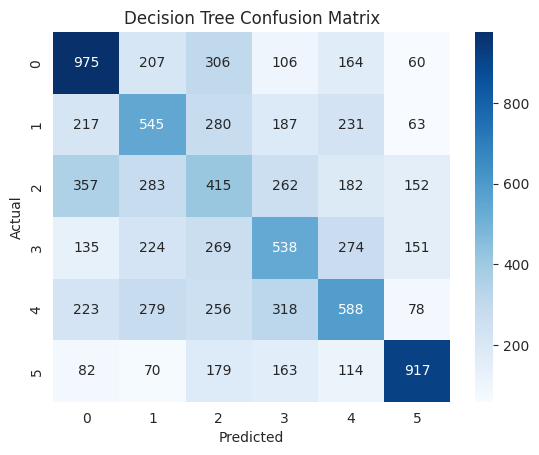


Decision Tree Results:
       Actual  Predicted_Decision Tree
30056       0                        0
11827       5                        5
23571       3                        4
14741       5                        5
25570       3                        3

Support Vector Classifier Confusion Matrix:
[[1696   10   64   44    0    4]
 [1166   29   55  211    0   62]
 [1294   34   95  147    0   81]
 [ 882   17   70  296    0  326]
 [1219   19   69  250    0  185]
 [ 369   27   54  341    0  734]]

Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.93      0.40      1818
           1       0.21      0.02      0.03      1523
           2       0.23      0.06      0.09      1651
           3       0.23      0.19      0.21      1591
           4       0.00      0.00      0.00      1742
           5       0.53      0.48      0.50      1525

    accuracy                           0.29      9850
   macro avg  

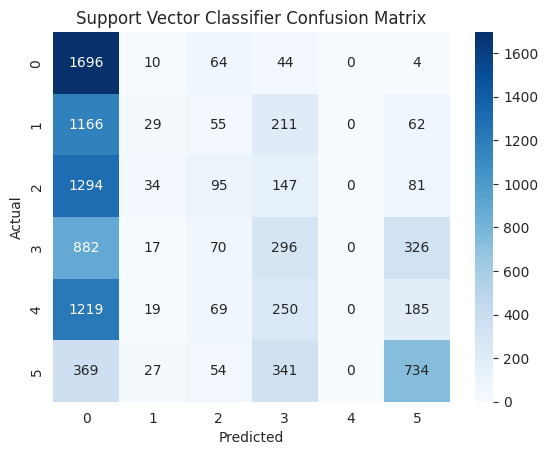


Support Vector Classifier Results:
       Actual  Predicted_Support Vector Classifier
30056       0                                    0
11827       5                                    5
23571       3                                    0
14741       5                                    0
25570       3                                    0

Random Forest Confusion Matrix:
[[1200  156  255   58  109   40]
 [ 177  638  231  192  237   48]
 [ 333  264  534  241  126  153]
 [  91  160  240  711  274  115]
 [ 206  244  170  238  814   70]
 [  69   33  115  127   50 1131]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62      1818
           1       0.43      0.42      0.42      1523
           2       0.35      0.32      0.33      1651
           3       0.45      0.45      0.45      1591
           4       0.51      0.47      0.49      1742
           5       0.73      0.74      0.73      1525

    accu

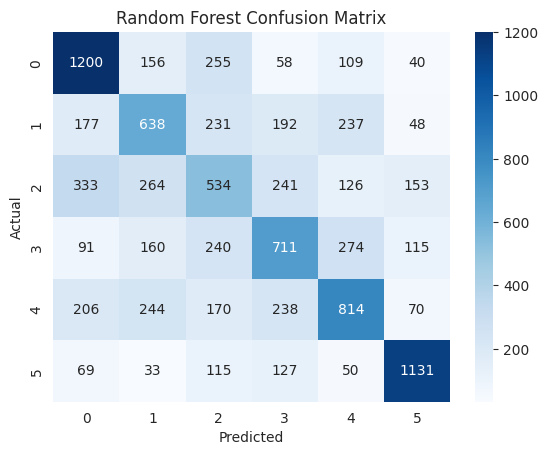


Random Forest Results:
       Actual  Predicted_Random Forest
30056       0                        2
11827       5                        5
23571       3                        1
14741       5                        5
25570       3                        2


In [ ]:

# Train each model
dt_classifier = DecisionTreeClassifier(random_state=42)
svc_classifier = SVC(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Fit models
dt_classifier.fit(X_train, y_train)
svc_classifier.fit(X_train, y_train)  # Ensure X_train is scaled if using SVC
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)
y_pred_svc = svc_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting the confusion matrix
    plot_confusion_matrix(y_test, y_pred, f"{model_name} Confusion Matrix")

    # Displaying results in a DataFrame
    df_results = pd.DataFrame({'Actual': y_test, f'Predicted_{model_name}': y_pred})
    print(f"\n{model_name} Results:")
    print(df_results.head())

# Helper function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluating each model
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_svc, "Support Vector Classifier")
evaluate_model(y_test, y_pred_rf, "Random Forest")


### Results for cross validation with RepeatedKFold:
### Model Performance Analysis

**Decision Tree Classifier**  
- **Confusion Matrix:** Shows a balanced distribution across most classes but struggles to distinguish between certain classes, leading to higher misclassifications (e.g., class 0 misclassified as classes 1, 2, and 4).  
- **Classification Report:** Achieved 40% accuracy, with a recall of 0.54 for class 0 but lower scores for others. Low f1-scores, especially for classes 1 and 2, indicate weak performance overall.  
- **Precision & Recall:** Highest for class 5 (0.65 precision, 0.60 recall), but lower for classes 2 and 3, reflecting frequent misclassifications.  
- **Observations:** Limited ability to distinguish classes, showing a bias towards predicting class 5 due to class distribution.

**Support Vector Classifier (SVC)**  
- **Confusion Matrix:** Imbalanced predictions, predominantly class 0, indicating struggles with non-linear boundaries or class imbalance.  
- **Classification Report:** Only 29% accuracy, with highest precision for class 5 (0.53) but low recall for classes 3 (0.19) and 4 (0).  
- **Precision & Recall:** High precision for class 0 (0.26) but very low for others, suggesting poor generalization.  
- **Observations:** Struggled with class separability, misclassifying nearly all examples as class 0.

**Random Forest Classifier**  
- **Confusion Matrix:** Better balance among classes with fewer misclassifications, particularly for classes 0, 3, and 5.  
- **Classification Report:** Achieved 51% accuracy, with decent precision and recall for classes 0 (0.58 precision, 0.66 recall), 4 (0.51 precision, 0.47 recall), and 5 (0.73 precision, 0.74 recall).  
- **Precision & Recall:** Highest f1-score for class 5 (0.73) and more consistent scores across all classes.  
- **Observations:** The ensemble approach captures complex patterns effectively, making it the best-performing model.

### Summary
- **Decision Tree:** Moderate performance with more misclassifications; better suited for simpler datasets.
- **SVC:** Underperformed significantly, struggling to generalize due to dataset complexity.
- **Random Forest:** Best performer with higher accuracy and balanced classification, indicating suitability for this dataset.

